In [23]:
import pandas as pd
import os 
os.getcwd()
os.chdir('/home/forecast/crimson/model1')

In [42]:
crim=pd.read_csv("crim.csv", parse_dates=True)
crim.head()

,Date,Time,Total searches,Discovery searches,Total views,Search views,Maps views,Total actions,Direct searches,Website actions,Directions actions,Phone call actions,Total owner photos,Owner photo views,Total customer photos,Customer photo views,Gross Revenue
0,5/1/2019,1,499,31,574,311,263,100,468,52,42,6,1,65,15,3392,6734.13
1,5/2/2019,2,639,57,702,363,339,115,582,50,62,3,1,171,15,4471,7259.17
2,5/3/2019,3,789,97,941,518,423,187,692,84,85,18,1,195,16,5453,11171.54
3,5/4/2019,4,658,75,715,396,319,172,583,64,92,16,1,101,16,3600,10104.82
4,5/5/2019,5,466,25,569,221,348,141,441,37,98,6,1,131,16,4392,9450.25


In [25]:
crim.describe()

,Time,Total searches,Discovery searches,Total views,Search views,Maps views,Total actions,Direct searches,Website actions,Directions actions,Phone call actions,Total owner photos,Owner photo views,Total customer photos,Customer photo views,Gross Revenue
count,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000,349.000000
mean,175.000000,785.518625,232.767908,1183.713467,181.724928,1001.988539,149.065903,552.750716,54.676218,83.799427,10.590258,404.180516,3336.481375,152.338109,3525.934097,7527.546877
std,100.891856,359.382217,217.822691,540.760935,54.350121,526.891568,43.905119,224.463929,20.897562,27.273938,9.928249,308.643303,3107.614682,107.200855,2245.130523,2519.411595
min,1.000000,269.000000,20.000000,367.000000,77.000000,257.000000,24.000000,160.000000,13.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,88.000000,510.000000,70.000000,731.000000,146.000000,560.000000,119.000000,405.000000,41.000000,63.000000,5.000000,1.000000,38.000000,39.000000,2365.000000,5535.060000
50%,175.000000,696.000000,161.000000,1085.000000,177.000000,883.000000,143.000000,503.000000,51.000000,81.000000,7.000000,571.000000,3934.000000,152.000000,3397.000000,6779.940000
75%,262.000000,982.000000,318.000000,1539.000000,209.000000,1332.000000,178.000000,654.000000,65.000000,100.000000,12.000000,670.000000,6005.000000,239.000000,4809.000000,9694.000000
max,349.000000,2311.000000,1498.000000,3058.000000,518.000000,2820.000000,331.000000,1610.000000,167.000000,164.000000,62.000000,680.000000,15322.000000,328.000000,10964.000000,17221.100000


In [36]:
b=crim.corr()

In [86]:
y=crim['Gross Revenue']
# x=crim[[i for i in list(crim.columns) if i != 'Gross Revenue' or i != 'Date']]
x=crim.iloc[:, 1:16]

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]


In [87]:
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [88]:
model=LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

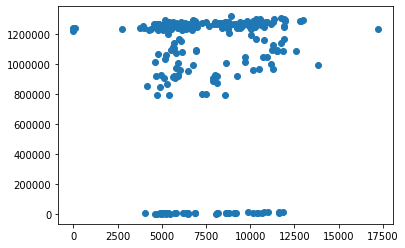

In [89]:
predictions=model.predict(test_x)
plt.scatter(test_y,predictions)

In [90]:
#Rsquared
print(model.score(test_x,test_y))
print(metrics.mean_squared_error(test_y,predictions))

-168509.8007904215
1166149637102.2717


In [114]:
import statsmodels.api as sm
model=sm.OLS(test_y, test_x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Gross Revenue   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              687.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):                   1.42e-187
Time:                        15:07:27   Log-Likelihood:                         -2327.3
No. Observations:                 269   AIC:                                      4679.
Df Residuals:                     257   BIC:                                      4722.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Time                     -3.3811      2.290     -1.477      0.141      -7.890       1.128
Total searches           -0.0025      0.402     -0.006      0.995      -0.794       0.789
Discovery searches        0.5300      0.441      1.202      0.231      -0.339       1.399
Total views               2.0157      0.959      2.103      0.036       0.128       3.904
Search views              3.6896      1.777      2.076      0.039       0.190       7.189
Maps views               -1.6739      0.883     -1.895      0.059      -3.413       0.065
Total actions            33.8552      2.546     13.299      0.000      28.842      38.868
Direct searches          -0.5325      0.339     -1.570      0.118      -1.200       0.135
Website actions          -8.5453      6.507     -1.313      0.190     -21.360       4.269
Directions actions       29.2391      4.308      6.787      0.000      20.755      37.723
Phone call actions       13.1614      9.137      1.440      0.151      -4.832      31.154
Total owner photos       -0.3887      0.918     -0.423      0.672      -2.197       1.420
Owner photo views         0.0094      0.050      0.187      0.852      -0.089       0.108
Total customer photos     0.0215      3.193      0.007      0.995      -6.266       6.309
Customer photo views     -0.0444      0.061     -0.731      0.466      -0.164       0.075
==============================================================================
Omnibus:                       24.300   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.894
Skew:                          -0.175   Prob(JB):                     1.11e-20
Kurtosis:                       5.842   Cond. No.                     6.52e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""